In [4]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard (1).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [0]:
data=pd.read_csv('creditcard.csv')

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.shape

(284047, 31)

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284047.000000,284046.000000,284046.000000,284046.000000
mean,94606.162287,0.000177,-0.001076,0.001928,0.000291,-0.000594,0.000252,-0.000485,-0.000337,-0.000151,-0.000029,0.001082,-0.000595,0.000097,0.000340,0.000465,-0.000036,0.000091,-0.000385,-0.000041,-0.000006,0.000003,-0.000148,-0.000113,0.000006,0.000351,-0.000020,-0.000005,0.000015,88.381614,0.001732
std,47381.344949,1.958521,1.651428,1.515589,1.415741,1.378657,1.331514,1.234892,1.194712,1.098663,1.088113,1.020768,0.999832,0.995497,0.958686,0.915549,0.876359,0.849596,0.838359,0.814013,0.771380,0.735110,0.725588,0.624941,0.605732,0.521122,0.482252,0.403581,0.330178,249.630716,0.041583
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54114.500000,-0.920154,-0.598980,-0.887567,-0.848607,-0.692377,-0.767926,-0.554172,-0.208497,-0.643494,-0.535192,-0.761412,-0.406317,-0.648525,-0.425089,-0.582347,-0.468306,-0.483597,-0.498850,-0.456445,-0.211748,-0.228312,-0.542149,-0.161900,-0.354558,-0.316725,-0.327052,-0.070834,-0.052936,5.600000,0.000000
50%,84553.000000,0.018613,0.064979,0.181960,-0.019337,-0.055107,-0.273724,0.039755,0.022386,-0.051715,-0.092753,-0.031356,0.139592,-0.013593,0.050791,0.048760,0.066353,-0.065539,-0.003976,0.003738,-0.062419,-0.029441,0.006675,-0.011297,0.041086,0.017142,-0.052314,0.001373,0.011294,22.000000,0.000000
75%,139087.000000,1.315362,0.802999,1.028302,0.744207,0.611071,0.398999,0.570007,0.327111,0.597288,0.454179,0.740468,0.618200,0.662532,0.493150,0.649746,0.523430,0.399706,0.500496,0.459093,0.133130,0.186196,0.528063,0.147478,0.439415,0.350958,0.241212,0.091007,0.078260,77.310000,0.000000
max,172103.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
data=data.sample(frac=0.1,random_state=1)
data.shape

(28405, 31)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

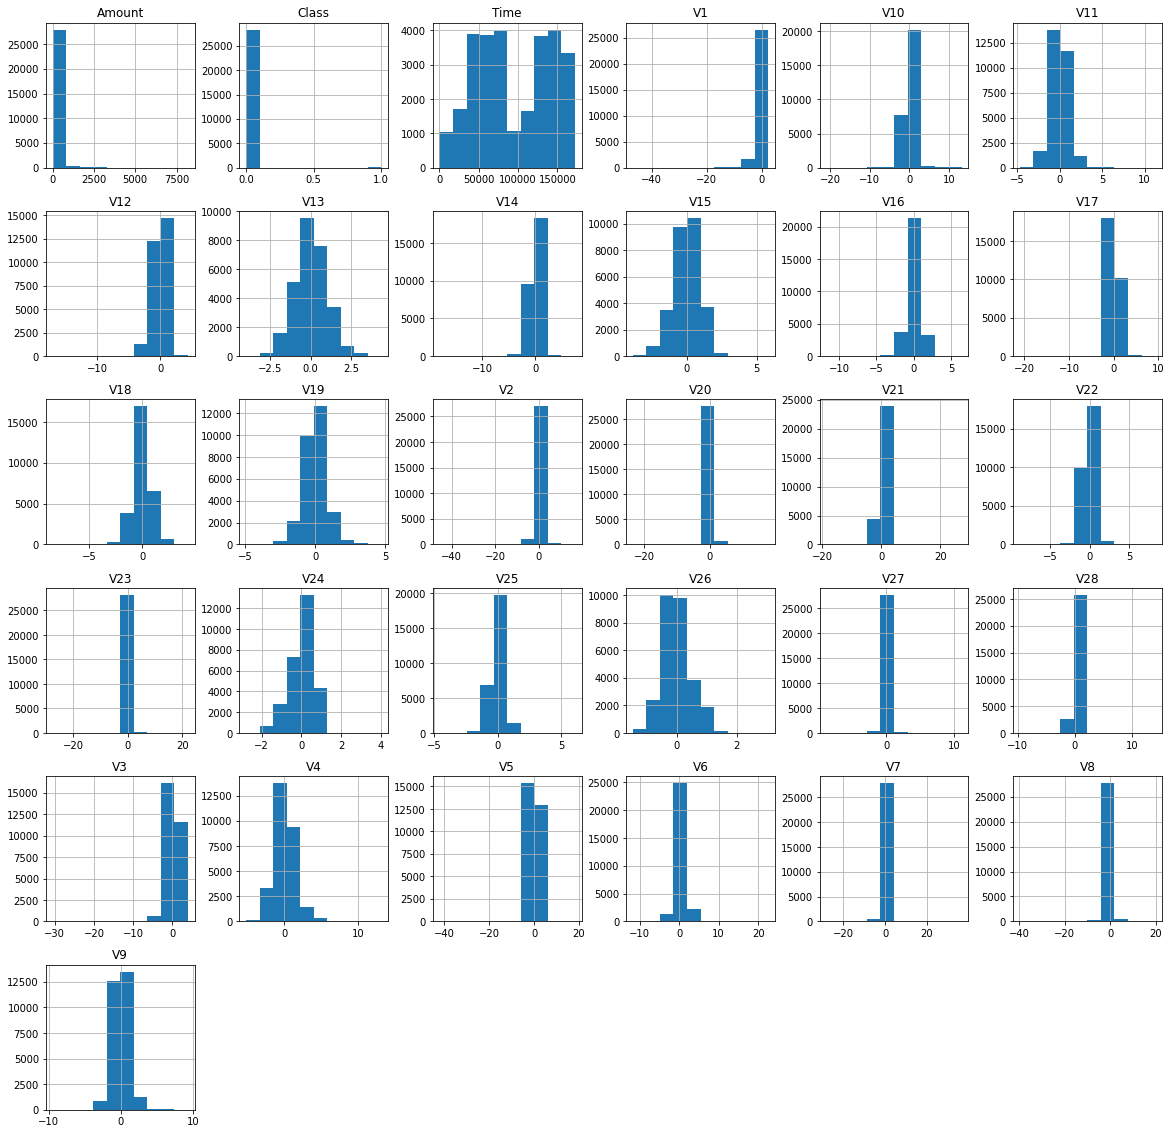

In [11]:
data.hist(figsize=(20,20))
plt.show()

In [12]:
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]
outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0014454942885347623


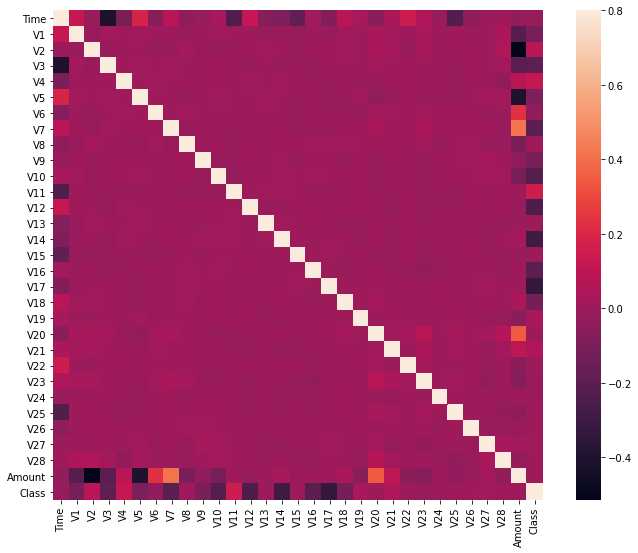

In [13]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [0]:
columns=data.columns.tolist()

# since anomaly detection is unsupervised, we only to provide Xs and remove the Ys
columns=[c for c in columns if c not in ['Class']]
target='Class'

In [18]:
X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(28405, 30)
(28405,)


Now we're going to use two algorithms : Isolation forest AND Local outlier factor

In [0]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [0]:
state=1

#define the oulier detection methods
classifiers={
    'Isolation Forest': IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    'Local Outlier Factor' : LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
    }

In [23]:
#fit the model
n_outliers=len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):

  #fit the data and tag outliers

  if clf_name=='Local Outlier Factor':
    y_pred=clf.fit_predict(X)
    scores_pred=clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred=clf.decision_function(X)
    y_pred=clf.predict(X)


    # reshape the prediction values to 0(for valid) and 1(for fraud)
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1

    n_errors=(y_pred!=Y).sum()

    print('{}: {}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest: 57
0.9979933110367893
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28364
         1.0       0.31      0.32      0.31        41

    accuracy                           1.00     28405
   macro avg       0.65      0.66      0.66     28405
weighted avg       1.00      1.00      1.00     28405

